# 8-3-DGEtargets

Jakke Neiro$^1$

1. Aboobaker laboratory, Department of Zoology, University of Oxford

## Contents of notebook

* 1. Introduction
* 2. Cowles 2014
* 3. Vogg 2014
* 4. Tu 2015
* 5. Stowers Institute 2016

# 1. Introduction

The results of the knockdown RNA-seq data were analyzed.

In [3]:
import pandas as pd
gffcmp = pd.read_csv("/drives/raid/AboobakerLab/jakke/sexual_genome_annotation_files/ncrna_Neiro/gffcmp.stringtie_merged.gtf.tmap", sep="\t")

In [4]:
import pandas as pd
human_gene_blast = pd.read_csv("/drives/raid/AboobakerLab/jakke/sexual_genome_annotation_files/blast_annotation/human_gene_blast.tab", sep="\t")

In [5]:
def blasted(prep_signf, human_gene_blast, gffcmp):
    prep_signf["Blast gene"] = "-"
    prep_signf["refgene"] = "-"
    for i in range(0,len(prep_signf)):
        blast = human_gene_blast[human_gene_blast["geneID"] == prep_signf.iloc[i,0]]
        refgene = gffcmp[gffcmp["qry_gene_id"] == prep_signf.iloc[i,0]]
        if len(blast) > 0:
            prep_signf["Blast gene"].iloc[i] = blast["Gene"].iloc[0]
        if len(refgene) > 0:
            prep_signf["refgene"].iloc[i] = refgene["ref_gene_id"].iloc[0]

# 2. Cowles 2014

## 2.1 DGE list

The DGE results from 8-2 were uploaded.

In [6]:
import pandas as pd
Cowles2014 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Cowles2014/res_Cowles2014.csv")

The differentially expressed genes ($p_{adj} < 0.05$) were selected for further study.

In [7]:
Cowles2014 = Cowles2014[Cowles2014["padj"] < 0.05]

The mammalian blast hits were added to the table of DGEs.

In [8]:
blasted(Cowles2014, human_gene_blast, gffcmp)

/drives/raid/AboobakerLab/jakke/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


The list of enhancers were uploaded.

In [9]:
enhancer_final = pd.read_excel("/drives/raid/AboobakerLab/jakke/enhancer_regions/enhancer_all_oct2021.xlsx").iloc[:,1:]

In [10]:
len(enhancer_final)

4326

The enhancers with bound or unbound motifs of coe were selected from the list of all enhancers.

In [11]:
coe_unbound_enhancers = enhancer_final[enhancer_final["Unbound motif names"].str.contains("coe")]
coe_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motif names"].str.contains("coe")]
coe_bound_enhancers = enhancer_final[enhancer_final["Bound motif names"].str.contains("coe")]
coe_bound_notenhancers = enhancer_final[~enhancer_final["Bound motif names"].str.contains("coe")]

## 2.2 All genes enrichment analysis

### 2.2.1 Proportions and constants

$n_{ge}$ is the total number of genes in the genome

In [12]:
import pandas as pd
n_ge = len(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Cowles2014/res_Cowles2014.csv"))

$p_{dge}$ is the proportion of differentially expressed genes (DGEs) upon coe(RNAi) of all genes in the genome.

In [13]:
print(len(Cowles2014))
p_dge = len(Cowles2014)/n_ge

869


In [14]:
p_dge

0.03103238938685141

$p_{cis}$ is the proportion of genes associated with an enhancer of all genes in the genome.

In [15]:
print(len(pd.Categorical(enhancer_final["GeneDescription"]).categories))
p_cis = len(pd.Categorical(enhancer_final["GeneDescription"]).categories)/n_ge

1702


In [16]:
p_cis

0.06077920222833268

$p_{TF}$ is the proportion of all genes associated with an enhancer that contain an unbound motif of coe in the associated enhancers. 

In [17]:
print(len(pd.Categorical(coe_unbound_enhancers["GeneDescription"]).categories))
p_TF = len(pd.Categorical(coe_unbound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

732


$p_{footTF}$ is the proportion of all genes associated with an enhancer that contain a bound motif of coe in the associated enhancers.

In [18]:
print(len(pd.Categorical(coe_bound_enhancers["GeneDescription"]).categories))
p_footTF = len(pd.Categorical(coe_bound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

56


### 2.2.2 Expected frequencies

The observed frequency of DEGs associated with an enhancer containing an unbound coe motif.

In [21]:
observed = len(pd.Categorical(coe_unbound_enhancers[coe_unbound_enhancers["geneId"].isin(Cowles2014.iloc[:,0])]["GeneDescription"]).categories)
print(observed)

33


The expected frequency of DEGs is
$$p_{dge}p_{cis}p_{TF}n_{ge}$$

In [22]:
expected = p_dge*p_cis*p_TF*n_ge
print(expected)

22.715709031175233


In [23]:
print(observed/expected)

1.4527391575015562


The observed frequency of DEGs associated with an enhancer containing an bound coe motif.

In [27]:
observed = len(pd.Categorical(coe_bound_enhancers[coe_bound_enhancers["geneId"].isin(Cowles2014.iloc[:,0])]["GeneDescription"]).categories)
print(observed)

4


The expected frequency of DEGs is
$$p_{dge}p_{cis}p_{footTF}n_{ge}$$

In [28]:
expected = p_dge*p_cis*p_footTF*n_ge
print(expected)

1.737813805663679


## 2.3 Transcription factors enrichment analysis

### 2.3.1 Proportions and constants

In [31]:
FACS = pd.read_csv("/drives/raid/AboobakerLab/jakke/FACS/FACS_prop.csv")

In [32]:
import pandas as pd
TF_table = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_data/Transcription_factors_01072021_values.csv").iloc[:,1:]

In [33]:
import pandas as pd
Cowles2014 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Cowles2014/res_Cowles2014.csv")
Cowles2014diff = Cowles2014[Cowles2014["padj"] < 0.05]
Cowles2014TF = Cowles2014diff[Cowles2014diff.iloc[:,0].isin(TF_table["Neiro"])]

In [34]:
print(len(Cowles2014TF))
p_dgetf = len(Cowles2014TF)/n_ge

8


### 2.3.2 Expected frequencies

In [36]:
observed = len(pd.Categorical(coe_unbound_enhancers[coe_unbound_enhancers["geneId"].isin(Cowles2014TF.iloc[:,0])]["GeneDescription"]).categories)
print(observed)

4


In [38]:
expected = p_dgetf*p_cis*p_TF*n_ge
print(expected)

0.20912045138020924


In [39]:
print(observed/expected)

19.12773224043716


In [42]:
observed = len(pd.Categorical(coe_bound_enhancers[coe_bound_enhancers["geneId"].isin(Cowles2014TF.iloc[:,0])]["GeneDescription"]).categories)
print(observed)

1


In [43]:
expected = p_dgetf*p_cis*p_footTF*n_ge
print(expected)

0.01599828589793951


In [44]:
print(observed/expected)

62.50669642857142


### 2.3.3 Specificity and sensitivity

Specificity:
$$
\frac{TN}{TN + FP}
$$

In [46]:
TN = len(TF_table[~TF_table["Neiro"].isin(Cowles2014diff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(coe_unbound_enhancers[coe_unbound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_unbound = TN/(TN+FP)
print(specificity_unbound)
FPR_unbound_coe = 1 - specificity_unbound
print(FPR_unbound_coe)

543
103
0.8405572755417957
0.1594427244582043


In [47]:
TN = len(TF_table[~TF_table["Neiro"].isin(Cowles2014diff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(coe_bound_enhancers[coe_bound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_bound = TN/(TN+FP)
print(specificity_bound)
FPR_bound_coe = 1 - specificity_bound
print(FPR_bound_coe)

543
8
0.985480943738657
0.014519056261342977


Sensitivity:
$$
\frac{TP}{TP + FN}
$$

In [48]:
TP = len(pd.Categorical(coe_unbound_enhancers[coe_unbound_enhancers["geneId"].isin(Cowles2014TF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Cowles2014TF[~Cowles2014TF.iloc[:,0].isin(coe_unbound_enhancers["geneId"])])
print(FN)
TPR_unbound_coe = TP/(TP+FN)
print(TPR_unbound_coe)

4
4
0.5


In [49]:
TP = len(pd.Categorical(coe_bound_enhancers[coe_bound_enhancers["geneId"].isin(Cowles2014TF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Cowles2014TF[~Cowles2014TF.iloc[:,0].isin(coe_bound_enhancers["geneId"])])
print(FN)
TPR_bound_coe = TP/(TP+FN)
print(TPR_bound_coe)

1
7
0.125


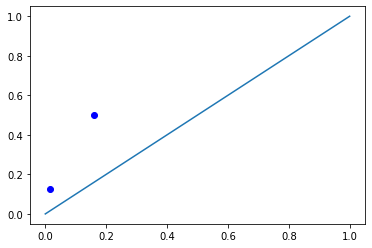

In [50]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(0,1, 50), np.linspace(0,1, 50))
plt.plot(FPR_unbound_coe, TPR_unbound_coe, "bo")
plt.plot(FPR_bound_coe, TPR_bound_coe, "bo")

In [52]:
pd.DataFrame({"coe": [FPR_unbound_coe, FPR_bound_coe, TPR_unbound_coe, TPR_bound_coe]}).to_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Cowles2014/ROC.csv")

## 2.4 Transcription factor targets

In [55]:
coe_target_tf_list = list(pd.Categorical(coe_unbound_enhancers[coe_unbound_enhancers["geneId"].isin(Cowles2014TF.iloc[:,0])]["geneId"]).categories)
print(coe_target_tf_list)

['MSTRG.10720', 'MSTRG.19091', 'MSTRG.19704', 'MSTRG.4837']


In [59]:
coe_dge_tf_table = TF_table[TF_table["Neiro"].isin(Cowles2014TF.iloc[:,0])]

In [58]:
coe_dge_tf_table[coe_dge_tf_table["Neiro"].isin(coe_target_tf_list)]

,Rink,Neiro,Symbol,Old symbol,Description,TF group,TF class,Identification,RNAi,In situ,Reference,X1,X2,Xins,X1 percent,X2 percent,Xins percent,Jaspar MatrixID,Jaspar Evalue
55,SMESG000069088.1,MSTRG.19091,coe,coe,Collier/olfactory/early B-cell factor,HLH,Basic domain,1.0,CNS defects,"CNS, Pharynx, Mesenchyme","(Cowles et al., 2013)",3.678686,11.531076,2.702819,0.205369,0.643742,0.150889,MA0154.3,0.000000e+00
350,SMESG000032751.1,MSTRG.10720,prox-3,NaN,Prospero homeobox protein 3,PROX,Helix-turn-helix,0.0,0,0,NaN,0.062141,3.539479,0.635444,0.014666,0.835361,0.149973,0,0.000000e+00
366,SMESG000013430.1,MSTRG.4837,pou4-1,pou4l-1/pou4,POU class 4 homeobox 1,POU,Helix-turn-helix,1.0,Brain defects,CNS,"(Önal et al., 2012; van Wolfswinkel et al., 20...",5.452494,5.756611,2.501233,0.397692,0.419874,0.182434,MA0791.1,1.090100e-75
374,SMESG000066574.1,MSTRG.19704,pax2/5/8-2,NaN,Paired box 2/5/8 protein 2,PAX,Helix-turn-helix,0.0,0,0,NaN,8.004656,9.021828,6.892441,0.334658,0.377184,0.288158,0,0.000000e+00


# 3. Vogg 2014

## 3.1 DGE list

In [121]:
import pandas as pd
Vogg2014 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Vogg2014/res_Vogg2014_3dpa.csv")

In [122]:
Vogg2014 = Vogg2014[Vogg2014["padj"] < 0.05]
blasted(Vogg2014, human_gene_blast, gffcmp)

/drives/raid/AboobakerLab/jakke/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [40]:
fox_unbound_enhancers = enhancer_final[enhancer_final["Unbound motif names"].str.contains("fox")]
fox_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motif names"].str.contains("fox")]
fox_bound_enhancers = enhancer_final[enhancer_final["Bound motif names"].str.contains("fox")]
fox_bound_notenhancers = enhancer_final[~enhancer_final["Bound motif names"].str.contains("fox")]

## 3.2 All genes enrichment analysis

### 3.2.1 Proportions and constants

In [138]:
import pandas as pd
n_ge = len(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Vogg2014/res_Vogg2014_3dpa.csv"))

In [139]:
print(len(Vogg2014))
p_dge = len(Vogg2014)/n_ge

59


In [140]:
print(len(pd.Categorical(enhancer_final["GeneDescription"]).categories))
p_cis = len(pd.Categorical(enhancer_final["GeneDescription"]).categories)/n_ge

1702


In [142]:
print(len(pd.Categorical(fox_unbound_enhancers["GeneDescription"]).categories))
p_TF = len(pd.Categorical(fox_unbound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

1526


In [143]:
print(len(pd.Categorical(fox_bound_enhancers["GeneDescription"]).categories))
p_footTF = len(pd.Categorical(fox_bound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

140


### 3.2.2 Expected frequencies

In [144]:
len(pd.Categorical(fox_unbound_enhancers[fox_unbound_enhancers["geneId"].isin(Vogg2014.iloc[:,0])]["GeneDescription"]).categories)

18

In [145]:
p_dge*p_cis*p_TF*n_ge

3.2151555190515304

In [146]:
len(pd.Categorical(fox_bound_enhancers[fox_bound_enhancers["geneId"].isin(Vogg2014.iloc[:,0])]["GeneDescription"]).categories)

2

In [147]:
p_dge*p_cis*p_footTF*n_ge

0.29496839624325966

## 3.2 Transcription factors

In [37]:
import pandas as pd
Vogg2014 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Vogg2014/res_Vogg2014_3dpa.csv")
Vogg2014diff = Vogg2014[Vogg2014["padj"] < 0.05]
Vogg2014TF = Vogg2014diff[Vogg2014diff.iloc[:,0].isin(TF_table["Neiro"])]

In [38]:
print(len(Vogg2014TF))
p_dgetf = len(Vogg2014TF)/n_ge

9


In [41]:
len(pd.Categorical(fox_unbound_enhancers[fox_unbound_enhancers["geneId"].isin(Vogg2014TF.iloc[:,0])]["GeneDescription"]).categories)

7

In [151]:
p_dgetf*p_cis*p_TF*n_ge

0.490447452058708

In [152]:
len(pd.Categorical(fox_bound_enhancers[fox_bound_enhancers["geneId"].isin(Vogg2014TF.iloc[:,0])]["GeneDescription"]).categories)

2

In [153]:
p_dgetf*p_cis*p_footTF*n_ge

0.044995179087954855

In [164]:
TN = len(TF_table[~TF_table["Neiro"].isin(Vogg2014diff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(fox_unbound_enhancers[fox_unbound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_unbound = TN/(TN+FP)
print(specificity_unbound)
FPR_unbound_fox = 1 - specificity_unbound
print(FPR_unbound_fox)

542
180
0.7506925207756233
0.24930747922437668


In [165]:
TN = len(TF_table[~TF_table["Neiro"].isin(Vogg2014diff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(fox_bound_enhancers[fox_bound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_bound = TN/(TN+FP)
print(specificity_bound)
FPR_bound_fox = 1 - specificity_bound
print(FPR_bound_fox)

542
23
0.95929203539823
0.04070796460176995


In [166]:
TP = len(pd.Categorical(fox_unbound_enhancers[fox_unbound_enhancers["geneId"].isin(Vogg2014TF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Vogg2014TF[~Vogg2014TF.iloc[:,0].isin(fox_unbound_enhancers["geneId"])])
print(FN)
TPR_unbound_fox = TP/(TP+FN)
print(TPR_unbound_fox)

7
2
0.7777777777777778


In [168]:
TP = len(pd.Categorical(fox_bound_enhancers[fox_bound_enhancers["geneId"].isin(Vogg2014TF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Vogg2014TF[~Vogg2014TF.iloc[:,0].isin(fox_bound_enhancers["geneId"])])
print(FN)
TPR_bound_fox = TP/(TP+FN)
print(TPR_bound_fox)

2
7
0.2222222222222222


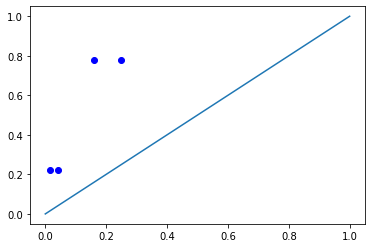

In [173]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(0,1, 50), np.linspace(0,1, 50))
plt.plot(FPR_unbound_coe, TPR_unbound_fox, "bo")
plt.plot(FPR_bound_coe, TPR_bound_fox, "bo")
plt.plot(FPR_unbound_fox, TPR_unbound_fox, "bo")
plt.plot(FPR_bound_fox, TPR_bound_fox, "bo")

# 4. Tu 2015

In [6]:
import pandas as pd
Tu2015 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Tu2015/res_Tu2015_p53.csv")

In [7]:
Tu2015 = Tu2015[Tu2015["padj"] < 0.05]
blasted(Tu2015, human_gene_blast, gffcmp)

/drives/raid/AboobakerLab/jakke/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
import pandas as pd
n_ge = len(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Tu2015/res_Tu2015_p53.csv"))

In [9]:
print(len(Tu2015))
p_dge = len(Tu2015)/n_ge

5556


In [12]:
enhancer_final = pd.read_excel("/drives/raid/AboobakerLab/jakke/enhancer_regions/enhancer_all_oct2021.xlsx").iloc[:,1:]

In [13]:
print(len(pd.Categorical(enhancer_final["GeneDescription"]).categories))
p_cis = len(pd.Categorical(enhancer_final["GeneDescription"]).categories)/n_ge

1702


In [19]:
p53_unbound_enhancers = enhancer_final[enhancer_final["Unbound motif names"].str.contains("53")]
p53_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motif names"].str.contains("p53")]
p53_bound_enhancers = enhancer_final[enhancer_final["Bound motif names"].str.contains("p53")]
p53_bound_notenhancers = enhancer_final[~enhancer_final["Bound motif names"].str.contains("p53")]

In [20]:
print(len(pd.Categorical(p53_unbound_enhancers["GeneDescription"]).categories))
p_TF = len(pd.Categorical(p53_unbound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

0


In [ ]:
len(pd.Categorical(fox_unbound_enhancers[fox_unbound_enhancers["geneId"].isin(Cowles2014.iloc[:,0])]["GeneDescription"]).categories)

# 5. Stowers Institute 2016

## 5.1 All genes

In [175]:
Stowers2016pax5 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Stowers2016/res_Stowers2016_pax5whole.csv")

In [176]:
Stowers2016pax5 = Stowers2016pax5[Stowers2016pax5["padj"] < 0.05]
blasted(Stowers2016pax5, human_gene_blast, gffcmp)

/drives/raid/AboobakerLab/jakke/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [177]:
import pandas as pd
n_ge = len(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Stowers2016/res_Stowers2016_pax5whole.csv"))

In [178]:
print(len(Stowers2016pax5))
p_dge = len(Stowers2016pax5)/n_ge

1346


In [179]:
enhancer_final = pd.read_excel("/drives/raid/AboobakerLab/jakke/enhancer_regions/enhancer_all_oct2021.xlsx").iloc[:,1:]

In [180]:
print(len(pd.Categorical(enhancer_final["GeneDescription"]).categories))
p_cis = len(pd.Categorical(enhancer_final["GeneDescription"]).categories)/n_ge

1702


In [181]:
pax5_unbound_enhancers = enhancer_final[enhancer_final["Unbound motif names"].str.contains("pax")]
pax5_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motif names"].str.contains("pax")]
pax5_bound_enhancers = enhancer_final[enhancer_final["Bound motif names"].str.contains("pax")]
pax5_bound_notenhancers = enhancer_final[~enhancer_final["Bound motif names"].str.contains("pax")]

In [182]:
print(len(pd.Categorical(pax5_unbound_enhancers["GeneDescription"]).categories))
p_TF = len(pd.Categorical(pax5_unbound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

1355


In [183]:
print(len(pd.Categorical(pax5_bound_enhancers["GeneDescription"]).categories))
p_footTF = len(pd.Categorical(pax5_bound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

218


In [184]:
len(pd.Categorical(pax5_unbound_enhancers[pax5_unbound_enhancers["geneId"].isin(Stowers2016pax5.iloc[:,0])]["GeneDescription"]).categories)

123

In [185]:
p_dge*p_cis*p_TF*n_ge

65.12980752062279

In [186]:
len(pd.Categorical(pax5_bound_enhancers[pax5_bound_enhancers["geneId"].isin(Stowers2016pax5.iloc[:,0])]["GeneDescription"]).categories)

21

In [187]:
p_dge*p_cis*p_footTF*n_ge

10.478448737635253

In [188]:
len(pd.Categorical(enhancer_final[enhancer_final["geneId"].isin(Stowers2016pax5.iloc[:,0])]["GeneDescription"]).categories)

162

## 5.2 Transcription factors

In [189]:
import pandas as pd
Stowers2016 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Stowers2016/res_Stowers2016_pax5whole.csv")
Stowers2016diff = Stowers2016[Stowers2016["padj"] < 0.05]
Stowers2016TF = Stowers2016diff[Stowers2016diff.iloc[:,0].isin(TF_table["Neiro"])]

In [191]:
print(len(Stowers2016TF))
p_dgetf = len(Stowers2016TF)/n_ge

44


In [193]:
len(pd.Categorical(pax5_unbound_enhancers[pax5_unbound_enhancers["geneId"].isin(Stowers2016TF.iloc[:,0])]["GeneDescription"]).categories)

18

In [194]:
p_dgetf*p_cis*p_TF*n_ge

2.1290576009713242

In [195]:
len(pd.Categorical(pax5_bound_enhancers[pax5_bound_enhancers["geneId"].isin(Stowers2016TF.iloc[:,0])]["GeneDescription"]).categories)

3

In [196]:
p_dgetf*p_cis*p_footTF*n_ge

0.34253472842195476

In [197]:
TN = len(TF_table[~TF_table["Neiro"].isin(Stowers2016diff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(pax5_unbound_enhancers[pax5_unbound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_unbound = TN/(TN+FP)
print(specificity_unbound)
FPR_unbound_pax5 = 1 - specificity_unbound
print(FPR_unbound_pax5)

507
166
0.7533432392273403
0.24665676077265974


In [198]:
TN = len(TF_table[~TF_table["Neiro"].isin(Stowers2016diff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(pax5_bound_enhancers[pax5_bound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_bound = TN/(TN+FP)
print(specificity_bound)
FPR_bound_pax5 = 1 - specificity_bound
print(FPR_bound_pax5)

507
32
0.9406307977736549
0.05936920222634512


In [199]:
TP = len(pd.Categorical(pax5_unbound_enhancers[pax5_unbound_enhancers["geneId"].isin(Stowers2016TF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Stowers2016TF[~Stowers2016TF.iloc[:,0].isin(pax5_unbound_enhancers["geneId"])])
print(FN)
TPR_unbound_pax5 = TP/(TP+FN)
print(TPR_unbound_pax5)

18
25
0.4186046511627907


In [200]:
TP = len(pd.Categorical(pax5_bound_enhancers[pax5_bound_enhancers["geneId"].isin(Stowers2016TF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Stowers2016TF[~Stowers2016TF.iloc[:,0].isin(pax5_bound_enhancers["geneId"])])
print(FN)
TPR_bound_pax5 = TP/(TP+FN)
print(TPR_bound_pax5)

3
41
0.06818181818181818


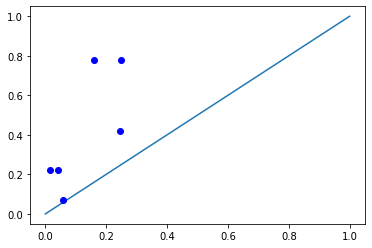

In [201]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(0,1, 50), np.linspace(0,1, 50))
plt.plot(FPR_unbound_coe, TPR_unbound_fox, "bo")
plt.plot(FPR_bound_coe, TPR_bound_fox, "bo")
plt.plot(FPR_unbound_fox, TPR_unbound_fox, "bo")
plt.plot(FPR_bound_fox, TPR_bound_fox, "bo")
plt.plot(FPR_unbound_pax5, TPR_unbound_pax5, "bo")
plt.plot(FPR_bound_pax5, TPR_bound_pax5, "bo")

# 6. Scimone 2017

## 6.1 myoD

### 6.1.1 All genes

In [4]:
import pandas as pd
Scimone2017myod = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/res_Scimone2017_myod.csv")

In [5]:
Scimone2017myod = Scimone2017myod[Scimone2017myod["padj"] < 0.05]
blasted(Scimone2017myod, human_gene_blast, gffcmp)

/drives/raid/AboobakerLab/jakke/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
enhancer_final = pd.read_excel("/drives/raid/AboobakerLab/jakke/enhancer_regions/enhancer_all_oct2021.xlsx").iloc[:,1:]

In [8]:
myod_unbound_enhancers = enhancer_final[enhancer_final["Unbound motif names"].str.contains("myo")]
myod_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motif names"].str.contains("myo")]
myod_bound_enhancers = enhancer_final[enhancer_final["Bound motif names"].str.contains("myo")]
myod_bound_notenhancers = enhancer_final[~enhancer_final["Bound motif names"].str.contains("myo")]

In [9]:
import pandas as pd
n_ge = len(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/res_Scimone2017_myod.csv"))

In [10]:
print(len(Scimone2017myod))
p_dge = len(Scimone2017myod)/n_ge

952


In [11]:
print(len(pd.Categorical(enhancer_final["GeneDescription"]).categories))
p_cis = len(pd.Categorical(enhancer_final["GeneDescription"]).categories)/n_ge

1702


In [15]:
print(len(pd.Categorical(myod_unbound_enhancers["GeneDescription"]).categories))
p_TF = len(pd.Categorical(myod_unbound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

1094


In [16]:
print(len(pd.Categorical(myod_bound_enhancers["GeneDescription"]).categories))
p_footTF = len(pd.Categorical(myod_bound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

145


In [17]:
len(pd.Categorical(myod_unbound_enhancers[myod_unbound_enhancers["geneId"].isin(Scimone2017myod.iloc[:,0])]["GeneDescription"]).categories)

70

In [18]:
p_dge*p_cis*p_TF*n_ge

37.19201514123487

In [19]:
len(pd.Categorical(myod_bound_enhancers[myod_bound_enhancers["geneId"].isin(Scimone2017myod.iloc[:,0])]["GeneDescription"]).categories)

15

In [20]:
p_dge*p_cis*p_footTF*n_ge

4.92947184230261

### 6.1.2 Transcription factors

In [22]:
import pandas as pd
TF_table = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_data/Transcription_factors_01072021_values.csv").iloc[:,1:]

In [23]:
import pandas as pd
Scimone2017myod = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/res_Scimone2017_myod.csv")
Scimone2017myoddiff = Scimone2017myod[Scimone2017myod["padj"] < 0.05]
Scimone2017myodTF = Scimone2017myoddiff[Scimone2017myoddiff.iloc[:,0].isin(TF_table["Neiro"])]

In [24]:
print(len(Scimone2017myodTF))
p_dgetf = len(Scimone2017myodTF)/n_ge

20


In [25]:
len(pd.Categorical(myod_unbound_enhancers[myod_unbound_enhancers["geneId"].isin(Scimone2017myodTF.iloc[:,0])]["GeneDescription"]).categories)

11

In [26]:
p_dgetf*p_cis*p_TF*n_ge

0.7813448559082955

In [27]:
len(pd.Categorical(myod_bound_enhancers[myod_bound_enhancers["geneId"].isin(Scimone2017myodTF.iloc[:,0])]["GeneDescription"]).categories)

2

In [28]:
p_dgetf*p_cis*p_footTF*n_ge

0.1035603328214834

In [29]:
TN = len(TF_table[~TF_table["Neiro"].isin(Scimone2017myoddiff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(myod_unbound_enhancers[myod_unbound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_unbound = TN/(TN+FP)
print(specificity_unbound)
FPR_unbound_myod = 1 - specificity_unbound
print(FPR_unbound_myod)

531
138
0.7937219730941704
0.20627802690582964


In [30]:
TN = len(TF_table[~TF_table["Neiro"].isin(Scimone2017myoddiff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(myod_bound_enhancers[myod_bound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_bound = TN/(TN+FP)
print(specificity_bound)
FPR_bound_myod = 1 - specificity_bound
print(FPR_bound_myod)

531
17
0.968978102189781
0.031021897810219023


In [33]:
TP = len(pd.Categorical(myod_unbound_enhancers[myod_unbound_enhancers["geneId"].isin(Scimone2017myodTF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Scimone2017myodTF[~Scimone2017myodTF.iloc[:,0].isin(myod_unbound_enhancers["geneId"])])
print(FN)
TPR_unbound_myod = TP/(TP+FN)
print(TPR_unbound_myod)

11
9
0.55


In [34]:
TP = len(pd.Categorical(myod_bound_enhancers[myod_bound_enhancers["geneId"].isin(Scimone2017myodTF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Scimone2017myodTF[~Scimone2017myodTF.iloc[:,0].isin(myod_bound_enhancers["geneId"])])
print(FN)
TPR_bound_myod = TP/(TP+FN)
print(TPR_bound_myod)

2
18
0.1


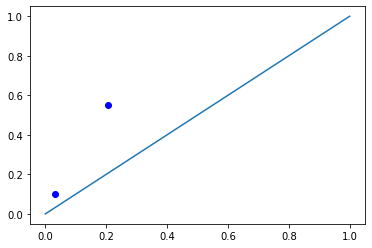

In [36]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(0,1, 50), np.linspace(0,1, 50))
plt.plot(FPR_unbound_myod, TPR_unbound_myod, "bo")
plt.plot(FPR_bound_myod, TPR_bound_myod, "bo")

## 6.2 nkx

### 6.2.1 All genes

In [37]:
import pandas as pd
Scimone2017nkx = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/res_Scimone2017_nkx.csv")

In [27]:
Scimone2017nkx = Scimone2017nkx[Scimone2017nkx["padj"] < 0.05]
blasted(Scimone2017nkx, human_gene_blast, gffcmp)

In [ ]:
enhancer_final = pd.read_excel("/drives/raid/AboobakerLab/jakke/enhancer_regions/enhancer_all_oct2021.xlsx").iloc[:,1:]

In [ ]:
import pandas as pd
n_ge = len(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/res_Scimone2017_nkx.csv"))

In [28]:
print(len(Scimone2017nkx))
p_dge = len(Scimone2017nkx)/n_ge

4972


In [29]:
print(len(pd.Categorical(enhancer_final["GeneDescription"]).categories))
p_cis = len(pd.Categorical(enhancer_final["GeneDescription"]).categories)/n_ge

1702


In [45]:
nkx_unbound_enhancers = enhancer_final[enhancer_final["Unbound motif names"].str.contains("nkx")]
nkx_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motif names"].str.contains("nkx")]
nkx_bound_enhancers = enhancer_final[enhancer_final["Bound motif names"].str.contains("nkx")]
nkx_bound_notenhancers = enhancer_final[~enhancer_final["Bound motif names"].str.contains("nkx")]

In [31]:
print(len(pd.Categorical(nkx_unbound_enhancers["GeneDescription"]).categories))
p_TF = len(pd.Categorical(nkx_unbound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

1663


In [32]:
print(len(pd.Categorical(nkx_bound_enhancers["GeneDescription"]).categories))
p_footTF = len(pd.Categorical(nkx_bound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

202


In [33]:
len(pd.Categorical(nkx_unbound_enhancers[nkx_unbound_enhancers["geneId"].isin(Scimone2017nkx.iloc[:,0])]["GeneDescription"]).categories)

502

In [34]:
p_dge*p_cis*p_TF*n_ge

295.26964968039135

In [35]:
len(pd.Categorical(nkx_bound_enhancers[nkx_bound_enhancers["geneId"].isin(Scimone2017nkx.iloc[:,0])]["GeneDescription"]).categories)

62

In [36]:
p_dge*p_cis*p_footTF*n_ge

35.86558583008963

### 6.2.2 Transcription factors

In [ ]:
import pandas as pd
TF_table = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_data/Transcription_factors_01072021_values.csv").iloc[:,1:]

In [42]:
import pandas as pd
Scimone2017nkx = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/res_Scimone2017_nkx.csv")
Scimone2017nkxdiff = Scimone2017nkx[Scimone2017nkx["padj"] < 0.05]
Scimone2017nkxTF = Scimone2017nkxdiff[Scimone2017nkxdiff.iloc[:,0].isin(TF_table["Neiro"])]

In [43]:
print(len(Scimone2017nkxTF))
p_dgetf = len(Scimone2017nkxTF)/n_ge

92


In [46]:
len(pd.Categorical(nkx_unbound_enhancers[nkx_unbound_enhancers["geneId"].isin(Scimone2017nkxTF.iloc[:,0])]["GeneDescription"]).categories)

29

In [47]:
p_dgetf*p_cis*p_TF*n_ge

3.594186337178159

In [48]:
len(pd.Categorical(nkx_bound_enhancers[nkx_bound_enhancers["geneId"].isin(Scimone2017nkxTF.iloc[:,0])]["GeneDescription"]).categories)

5

In [49]:
p_dgetf*p_cis*p_footTF*n_ge

0.4763775309788236

In [50]:
TN = len(TF_table[~TF_table["Neiro"].isin(Scimone2017nkxdiff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(nkx_unbound_enhancers[nkx_unbound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_unbound = TN/(TN+FP)
print(specificity_unbound)
FPR_unbound_nkx = 1 - specificity_unbound
print(FPR_unbound_nkx)

459
182
0.7160686427457098
0.2839313572542902


In [51]:
TN = len(TF_table[~TF_table["Neiro"].isin(Scimone2017nkxdiff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(nkx_bound_enhancers[nkx_bound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_bound = TN/(TN+FP)
print(specificity_bound)
FPR_bound_nkx = 1 - specificity_bound
print(FPR_bound_nkx)

459
30
0.9386503067484663
0.06134969325153372


In [52]:
TP = len(pd.Categorical(nkx_unbound_enhancers[nkx_unbound_enhancers["geneId"].isin(Scimone2017nkxTF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Scimone2017nkxTF[~Scimone2017nkxTF.iloc[:,0].isin(nkx_unbound_enhancers["geneId"])])
print(FN)
TPR_unbound_nkx = TP/(TP+FN)
print(TPR_unbound_nkx)

29
60
0.3258426966292135


In [53]:
TP = len(pd.Categorical(nkx_bound_enhancers[nkx_bound_enhancers["geneId"].isin(Scimone2017nkxTF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Scimone2017nkxTF[~Scimone2017nkxTF.iloc[:,0].isin(nkx_bound_enhancers["geneId"])])
print(FN)
TPR_bound_nkx = TP/(TP+FN)
print(TPR_bound_nkx)

5
87
0.05434782608695652


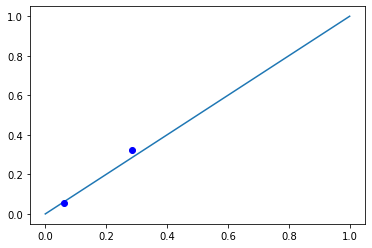

In [54]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(0,1, 50), np.linspace(0,1, 50))
plt.plot(FPR_unbound_nkx, TPR_unbound_nkx, "bo")
plt.plot(FPR_bound_nkx, TPR_bound_nkx, "bo")

# 7. Ross 2018

In [78]:
import pandas as pd
Ross2018 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Ross2018/res_Ross2018.csv")

In [80]:
Ross2018 = Ross2018[Ross2018["padj"] < 0.05]
blasted(Ross2018, human_gene_blast, gffcmp)

/tmp/ipykernel_2524153/1569082772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_signf["Blast gene"] = "-"
/tmp/ipykernel_2524153/1569082772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_signf["refgene"] = "-"
/drives/raid/AboobakerLab/jakke/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

# 8. Arnold 2021

In [58]:
import pandas as pd
pd.Categorical(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/SraRunTable.txt")["RNAi"])

['hox1', 'hox1', 'hox3a', 'hox3a', 'hox3b', ..., 'post2b', 'post2b', 'post2b', 'unc', 'unc']
Length: 24
Categories (6, object): ['hox1', 'hox3a', 'hox3b', 'lox5b', 'post2b', 'unc']

* Hox1: Motif
* Hox3a: Motif
* Hox3b: No motif
* Lox5B: Motif
* Post2b: No Motoif

## 8.1 Hox1

### 8.1.1 All genes

In [96]:
import pandas as pd
Arnold2021hox1 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/res_Arnold2021hox1.csv")

In [97]:
Arnold2021hox1 = Arnold2021hox1[(Arnold2021hox1["padj"] < 0.05)]
blasted(Arnold2021hox1, human_gene_blast, gffcmp)

/drives/raid/AboobakerLab/jakke/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [98]:
enhancer_final = pd.read_excel("/drives/raid/AboobakerLab/jakke/enhancer_regions/enhancer_all_oct2021.xlsx").iloc[:,1:]

In [99]:
import pandas as pd
n_ge = len(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/res_Arnold2021hox1.csv"))

In [100]:
print(len(Arnold2021hox1))
p_dge = len(Arnold2021hox1)/n_ge

1350


In [101]:
print(len(pd.Categorical(enhancer_final["GeneDescription"]).categories))
p_cis = len(pd.Categorical(enhancer_final["GeneDescription"]).categories)/n_ge

1702


In [71]:
hox1_unbound_enhancers = enhancer_final[enhancer_final["Unbound motifs"].str.contains("MSTRG.23578")]
hox1_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motifs"].str.contains("MSTRG.23578")]
hox1_bound_enhancers = enhancer_final[enhancer_final["Bound motifs"].str.contains("MSTRG.23578")]
hox1_bound_notenhancers = enhancer_final[~enhancer_final["Bound motifs"].str.contains("MSTRG.23578")]

In [102]:
hox1_unbound_enhancers = enhancer_final[enhancer_final["Unbound motif names"].str.contains("hox")]
hox1_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motif names"].str.contains("hox")]
hox1_bound_enhancers = enhancer_final[enhancer_final["Bound motif names"].str.contains("hox")]
hox1_bound_notenhancers = enhancer_final[~enhancer_final["Bound motif names"].str.contains("hox")]

In [103]:
print(len(pd.Categorical(hox1_unbound_enhancers["GeneDescription"]).categories))
p_TF = len(pd.Categorical(hox1_unbound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

1025


In [104]:
print(len(pd.Categorical(hox1_bound_enhancers["GeneDescription"]).categories))
p_footTF = len(pd.Categorical(hox1_bound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

42


In [105]:
len(pd.Categorical(hox1_unbound_enhancers[hox1_unbound_enhancers["geneId"].isin(Arnold2021hox1.iloc[:,0])]["GeneDescription"]).categories)

87

In [106]:
p_dge*p_cis*p_TF*n_ge

49.41434846266471

In [107]:
len(pd.Categorical(hox1_bound_enhancers[hox1_bound_enhancers["geneId"].isin(Arnold2021hox1.iloc[:,0])]["GeneDescription"]).categories)

4

In [108]:
p_dge*p_cis*p_footTF*n_ge

2.0247830589579685

### 8.1.2 Transcription factors

In [109]:
import pandas as pd
TF_table = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_data/Transcription_factors_01072021_values.csv").iloc[:,1:]

In [110]:
import pandas as pd
Arnold2021hox1 = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/res_Arnold2021hox1.csv")
Arnold2021hox1diff = Arnold2021hox1[Arnold2021hox1["padj"] < 0.05]
Arnold2021hox1TF = Arnold2021hox1diff[Arnold2021hox1diff.iloc[:,0].isin(TF_table["Neiro"])]

In [111]:
print(len(Arnold2021hox1TF))
p_dgetf = len(Arnold2021hox1TF)/n_ge

38


In [112]:
len(pd.Categorical(myod_unbound_enhancers[myod_unbound_enhancers["geneId"].isin(Arnold2021hox1TF.iloc[:,0])]["GeneDescription"]).categories)

8

In [113]:
p_dgetf*p_cis*p_TF*n_ge

1.390922401171303

In [114]:
len(pd.Categorical(myod_bound_enhancers[myod_bound_enhancers["geneId"].isin(Arnold2021hox1TF.iloc[:,0])]["GeneDescription"]).categories)

3

In [115]:
p_dgetf*p_cis*p_footTF*n_ge

0.056993893511409495

In [116]:
TN = len(TF_table[~TF_table["Neiro"].isin(Arnold2021hox1diff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(hox1_unbound_enhancers[hox1_unbound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_unbound = TN/(TN+FP)
print(specificity_unbound)
FPR_unbound_hox1 = 1 - specificity_unbound
print(FPR_unbound_hox1)

513
141
0.7844036697247706
0.2155963302752294


In [117]:
TN = len(TF_table[~TF_table["Neiro"].isin(Arnold2021hox1diff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(hox1_bound_enhancers[hox1_bound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_unbound = TN/(TN+FP)
print(specificity_bound)
FPR_bound_hox1 = 1 - specificity_bound
print(FPR_bound_hox1)

513
11
0.9386503067484663
0.06134969325153372


In [118]:
TP = len(pd.Categorical(hox1_unbound_enhancers[hox1_unbound_enhancers["geneId"].isin(Arnold2021hox1TF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Arnold2021hox1TF[~Arnold2021hox1TF.iloc[:,0].isin(hox1_unbound_enhancers["geneId"])])
print(FN)
TPR_unbound_hox1 = TP/(TP+FN)
print(TPR_unbound_hox1)

8
30
0.21052631578947367


In [119]:
TP = len(pd.Categorical(hox1_bound_enhancers[hox1_bound_enhancers["geneId"].isin(Arnold2021hox1TF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Arnold2021hox1TF[~Arnold2021hox1TF.iloc[:,0].isin(hox1_bound_enhancers["geneId"])])
print(FN)
TPR_bound_hox1 = TP/(TP+FN)
print(TPR_bound_hox1)

1
37
0.02631578947368421


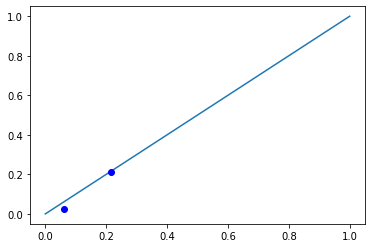

In [120]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(0,1, 50), np.linspace(0,1, 50))
plt.plot(FPR_unbound_hox1, TPR_unbound_hox1, "bo")
plt.plot(FPR_bound_hox1, TPR_bound_hox1, "bo")

## 8.2 Hox3a

### 8.2.1 All genes

In [121]:
import pandas as pd
Arnold2021hox3a = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/res_Arnold2021hox3a.csv")

In [122]:
Arnold2021hox3a = Arnold2021hox3a[(Arnold2021hox3a["padj"] < 0.05)]
blasted(Arnold2021hox3a, human_gene_blast, gffcmp)

/drives/raid/AboobakerLab/jakke/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [123]:
enhancer_final = pd.read_excel("/drives/raid/AboobakerLab/jakke/enhancer_regions/enhancer_all_oct2021.xlsx").iloc[:,1:]

In [124]:
import pandas as pd
n_ge = len(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/res_Arnold2021hox3a.csv"))

In [125]:
print(len(Arnold2021hox3a))
p_dge = len(Arnold2021hox3a)/n_ge

2334


In [126]:
print(len(pd.Categorical(enhancer_final["GeneDescription"]).categories))
p_cis = len(pd.Categorical(enhancer_final["GeneDescription"]).categories)/n_ge

1702


In [127]:
hox3a_unbound_enhancers = enhancer_final[enhancer_final["Unbound motif names"].str.contains("hox")]
hox3a_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motif names"].str.contains("hox")]
hox3a_bound_enhancers = enhancer_final[enhancer_final["Bound motif names"].str.contains("hox")]
hox3a_bound_notenhancers = enhancer_final[~enhancer_final["Bound motif names"].str.contains("hox")]

In [128]:
print(len(pd.Categorical(hox3a_unbound_enhancers["GeneDescription"]).categories))
p_TF = len(pd.Categorical(hox3a_unbound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

1025


In [129]:
print(len(pd.Categorical(hox3a_bound_enhancers["GeneDescription"]).categories))
p_footTF = len(pd.Categorical(hox3a_bound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

42


In [131]:
len(pd.Categorical(hox3a_unbound_enhancers[hox3a_unbound_enhancers["geneId"].isin(Arnold2021hox3a.iloc[:,0])]["GeneDescription"]).categories)

154

In [132]:
p_dge*p_cis*p_TF*n_ge

85.43191800878476

In [133]:
len(pd.Categorical(hox3a_bound_enhancers[hox3a_bound_enhancers["geneId"].isin(Arnold2021hox3a.iloc[:,0])]["GeneDescription"]).categories)

5

In [134]:
p_dge*p_cis*p_footTF*n_ge

3.500624933042888

### 8.2.2 Transcription factors

In [135]:
import pandas as pd
TF_table = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_data/Transcription_factors_01072021_values.csv").iloc[:,1:]

In [136]:
import pandas as pd
Arnold2021hox3a = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/res_Arnold2021hox3a.csv")
Arnold2021hox3adiff = Arnold2021hox3a[Arnold2021hox3a["padj"] < 0.05]
Arnold2021hox3aTF = Arnold2021hox3adiff[Arnold2021hox3adiff.iloc[:,0].isin(TF_table["Neiro"])]

In [138]:
print(len(Arnold2021hox3aTF))
p_dgetf = len(Arnold2021hox3aTF)/n_ge

50


In [139]:
len(pd.Categorical(hox3a_unbound_enhancers[hox3a_unbound_enhancers["geneId"].isin(Arnold2021hox3aTF.iloc[:,0])]["GeneDescription"]).categories)

14

In [140]:
p_dgetf*p_cis*p_TF*n_ge

1.8301610541727673

In [141]:
len(pd.Categorical(hox3a_bound_enhancers[hox3a_bound_enhancers["geneId"].isin(Arnold2021hox3aTF.iloc[:,0])]["GeneDescription"]).categories)

0

In [142]:
p_dgetf*p_cis*p_footTF*n_ge

0.07499196514659143

In [143]:
TN = len(TF_table[~TF_table["Neiro"].isin(Arnold2021hox3adiff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(hox3a_unbound_enhancers[hox3a_unbound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_unbound = TN/(TN+FP)
print(specificity_unbound)
FPR_unbound_hox3a = 1 - specificity_unbound
print(FPR_unbound_hox3a)

501
141
0.780373831775701
0.21962616822429903


In [144]:
TN = len(TF_table[~TF_table["Neiro"].isin(Arnold2021hox3adiff.iloc[:,0])])
print(TN)
FP = len(pd.Categorical(hox3a_bound_enhancers[hox3a_bound_enhancers["geneId"].isin(TF_table["Neiro"])]["GeneDescription"]).categories)
print(FP)
specificity_bound = TN/(TN+FP)
print(specificity_bound)
FPR_bound_hox3a = 1 - specificity_bound
print(FPR_bound_hox3a)

501
11
0.978515625
0.021484375


In [145]:
TP = len(pd.Categorical(hox3a_unbound_enhancers[hox3a_unbound_enhancers["geneId"].isin(Arnold2021hox3aTF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Arnold2021hox3aTF[~Arnold2021hox3aTF.iloc[:,0].isin(hox3a_unbound_enhancers["geneId"])])
print(FN)
TPR_unbound_hox3a = TP/(TP+FN)
print(TPR_unbound_hox3a)

14
36
0.28


In [146]:
TP = len(pd.Categorical(hox3a_bound_enhancers[hox3a_bound_enhancers["geneId"].isin(Arnold2021hox3aTF.iloc[:,0])]["GeneDescription"]).categories)
print(TP)
FN = len(Arnold2021hox3aTF[~Arnold2021hox3aTF.iloc[:,0].isin(hox3a_bound_enhancers["geneId"])])
print(FN)
TPR_bound_hox3a = TP/(TP+FN)
print(TPR_bound_hox3a)

0
50
0.0


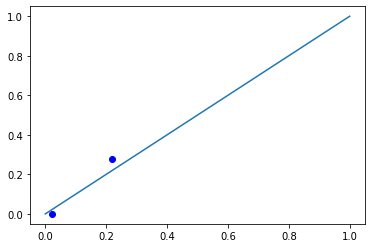

In [147]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(0,1, 50), np.linspace(0,1, 50))
plt.plot(FPR_unbound_hox3a, TPR_unbound_hox3a, "bo")
plt.plot(FPR_bound_hox3a, TPR_bound_hox3a, "bo")

## 8.3 lox5b

### All genes

In [151]:
import pandas as pd
Arnold2021lox5b = pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/res_Arnold2021lox5b.csv")

In [152]:
Arnold2021lox5b = Arnold2021lox5b[(Arnold2021lox5b["padj"] < 0.05)]
blasted(Arnold2021lox5b, human_gene_blast, gffcmp)

/drives/raid/AboobakerLab/jakke/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [153]:
import pandas as pd
n_ge = len(pd.read_csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/res_Arnold2021lox5b.csv"))

In [155]:
print(len(Arnold2021lox5b))
p_dge = len(Arnold2021lox5b)/n_ge

7838


In [156]:
print(len(pd.Categorical(enhancer_final["GeneDescription"]).categories))
p_cis = len(pd.Categorical(enhancer_final["GeneDescription"]).categories)/n_ge

1702


In [163]:
lox5b_unbound_enhancers = enhancer_final[enhancer_final["Unbound motif names"].str.contains("Lox")]
lox5b_unbound_notenhancers = enhancer_final[~enhancer_final["Unbound motif names"].str.contains("Lox")]
lox5b_bound_enhancers = enhancer_final[enhancer_final["Bound motif names"].str.contains("Lox")]
lox5b_bound_notenhancers = enhancer_final[~enhancer_final["Bound motif names"].str.contains("Lox")]

In [164]:
print(len(pd.Categorical(lox5b_unbound_enhancers["GeneDescription"]).categories))
p_TF = len(pd.Categorical(lox5b_unbound_enhancers["GeneDescription"]).categories)/len(pd.Categorical(enhancer_final["GeneDescription"]).categories)

1235
